# Dynamics of a Falling Square

In [1]:
import numpy as np    ##################Packages needed
import matplotlib.pyplot as plt
import ode
from vpython import *
from scipy.linalg import solve
from scipy.optimize import fsolve
import math

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1. Center of Mass Motion During Free Fall 



Observing the center of mass during free fall is a good starting place to help understand the dynamics of a falling square. To start, initail conditions should be defined.


In [2]:
global g,m,xi,yi,vxi,vyi,thetai,omegai,dt,h,w,l,DTC
g=9.8
m=5
xi=0
yi=10
vxi=0
vyi=0
thetai=0
omegai=6
dt = 0.01
h=2
w=.1
l=2
DTC=np.sqrt(h**2+l**2) #Distance To Corner
I=m*(h**2+l**2)/12
global L 
L=50 #Ground length in Vpython

### 1.1 Solving Motion of CM During Free Fall


During Freefall, the only force acting on the square is the force of gravity, which takes the form $ m\ddot x=- mg$. To solve this ODE, a function is created that takes in inital parameters of $x,y,v_x,v_y,\theta,\omega$ and updates each parameter during the time step. The RK4 ODE solver is then used to create the motion of the square's center of mass. Once the square reaches a certain height, representing the ground, the center of mass changes bounces back up with a velocity of the same magnitude.     

In [3]:
def model_RigidBodyFF(s0,t): # s0=[x,y,vx,vy,theta,omega]
    
    ds=np.zeros(len(s0))
    
    ds[0]=s0[2]  #dx
    ds[1]=s0[3]  #dy
    ds[2]=0      #dvx no a in xdirection
    ds[3]=-g     #dvy
    ds[4]=s0[5]  #dtheta
    ds[5]=0      #domega 
        
        
    
    return ds

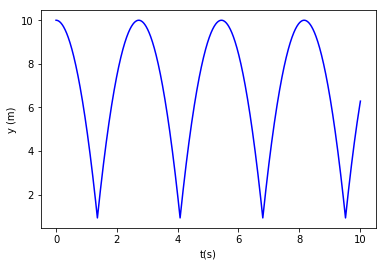

In [4]:

t = 0
tfinal=10 


s0 = [xi,yi,vxi,vyi,thetai,omegai] #reset in case I run this cell again

ta =np.array([t]) #array of t values
xdata=np.array([xi])#array of x values
ydata=np.array([yi])#array of y values
thetaData=np.array([thetai]) #array of theta values 
OmegaData=np.array([omegai])#array of omega values

while t < tfinal: #integrate until tfinal
   
    s1 = ode.RK4n(model_RigidBodyFF, s0, t, dt) #update y[n]
    
    for i in range(len(s1)): #reset y0 to the new vector
        s0[i] = s1[i]

    t = t + dt #update clock

    ta=np.append(ta,t)#Appends new Data################
    xdata=np.append(xdata,s0[0])
    ydata=np.append(ydata,s0[1])
    thetaData=np.append(thetaData,s0[4])
    OmegaData=np.append(OmegaData,s0[5]) ###############
    
    if s0[1]<l/2:  #Condition for velocity to switch directions
        s0[3]=-s0[3]
        
    
plt.figure()
plt.plot(ta,ydata, 'b-')
plt.xlabel('t(s)')
plt.ylabel('y (m)')

  
plt.show()

Once the y data was obtained, the plot for y as a function of time can be produced. 

### 1.2 Animating Trajectory of Square

Once the data and plot are obtained it's helpful animated the motion to get a better idea of what the motion looks like. A function is made to help do this. 


In [5]:
def AnimateFF(tarray,xlist,ylist,thetalist):
    scene=canvas()
    
  
    floor=box(pos=vec(0,0,0), width=10, length=L,height=.1,color=color.green)
    RB=box(pos=vec(xi,yi,0),width=w,height=h,length=l,color=color.red)
    
    RB.rotate(angle=thetai, axis=vector(0,0,1))# Initial Rotation 
    for i in np.arange(0,len(xlist)):
        rate(60)
  
       
        #redraw objects
        RB.pos.x = xlist[i]
        RB.pos.y = ylist[i]
        if i==0:
            RB.rotate(angle=thetalist[i], axis=vector(0,0,1),origin=RB.pos)
        else:  
            RB.rotate(angle=thetalist[i]-thetalist[i-1], axis=vector(0,0,1),origin=RB.pos)#determines change in rotation
        
        
       

In [13]:
AnimateFF(ta,xdata,ydata,thetaData)#Call function

<IPython.core.display.Javascript object>

## 2. Detecting Collision Points

The next step in obtaining the motion is to determine when a collision happens. To get an accurate position of where the collions happens between the square and the ground the postion of each corner has to be calculated.

### 2.1 Using a rotation matrix 

To start, inital starting positons for the corners are defined and by using the rotation matrix

$$
\left(\begin{array}{cc} 
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta)
\end{array}\right)
$$ 

The new rotated positions of each corner is found then by adding that new postion vector with the position of the CM the new location of each corner can be calculated.

$$\vec r_{corner}=r_{CM}+r_{rel}$$

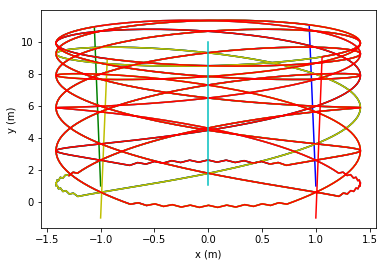

In [7]:
t = 0
tfinal=10


s0 = [xi,yi,vxi,vyi,thetai,omegai] #reset in case I run this cell again

ta =np.array([t])
xdata=np.array([xi])
ydata=np.array([yi])
thetaData=np.array([thetai])  
OmegaData=np.array([omegai])

r1cx=np.array([l/2]) #First Corner x data
r1cy=np.array([h/2])     #ydata
r2cx=np.array([-l/2])#2nd Corner x data
r2cy=np.array([h/2])    #ydata
r3cx=np.array([-l/2]) #3rd Corner x data 
r3cy=np.array([-h/2])   #ydata
r4cx=np.array([l/2])  #4th Corner x data
r4cy=np.array([-h/2])   #ydata

r1c=np.array([r1cx,r1cy])#ARRAYS HOLDING INITAL POS
r2c=np.array([r2cx,r2cy])
r3c=np.array([r3cx,r3cy])
r4c=np.array([r4cx,r4cy])


while t < tfinal:
    #integrate
    s1 = ode.RK4n(model_RigidBodyFF, s0, t, dt) #update y[n]
    
    for i in range(len(s1)): #reset y0 to the new vector
        s0[i] = s1[i]

    t = t + dt #update clock

    ta=np.append(ta,t)
    xdata=np.append(xdata,s0[0])
    ydata=np.append(ydata,s0[1])
    thetaData=np.append(thetaData,s0[4])
    OmegaData=np.append(OmegaData,s0[5])
        
    
    theta=s0[4]
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))#Rotation Matrix
    rel1c=np.dot(R,r1c) #Rotated positions 
    rel2c=np.dot(R,r2c)
    rel3c=np.dot(R,r3c)
    rel4c=np.dot(R,r4c)
    
    
    r1cx=np.append(r1cx,rel1c[0]+s0[0]) #Append New Data Points for corners
    r1cy=np.append(r1cy,rel1c[1]+s0[1])
    r2cx=np.append(r2cx,rel2c[0]+s0[0])
    r2cy=np.append(r2cy,rel2c[1]+s0[1])
    r3cx=np.append(r3cx,rel3c[0]+s0[0])
    r3cy=np.append(r3cy,rel3c[1]+s0[1])
    r4cx=np.append(r4cx,rel4c[0]+s0[0])
    r4cy=np.append(r4cy,rel4c[1]+s0[1])

    
    
    #if rel1c[1]+s0[1] < 0.001:
         #s0[3]=-s0[3]
     
    #elif rel2c[1]+s0[1] < 0.001:
         #s0[3]=-s0[3]
   # elif rel3c[1]+s0[1] < 0.001:
        #s0[3]=-s0[3]
    #elif rel4c[1]+s0[1] < 0.001:
         #s0[3]=-s0[3]
    #elif s0[1] < (l/2):
        #s0[3]=-s0[3]

    y_corners=[r1cy[-1],r2cy[-1],r3cy[-1],r4cy[-1]] #Y pos of each corner
    for i in range(len(y_corners)): #test to see if any of the corners hit zero
        if y_corners[i] < 0:
             s0[3]=-s0[3] #Velocity reversed 
            
    if s0[1] < (l/2):
        s0[3]=-s0[3]
    
plt.figure()
plt.plot(r1cx,r1cy, 'b-')
plt.plot(r2cx,r2cy, 'g-')
plt.plot(r3cx,r3cy, 'y-')
plt.plot(r4cx,r4cy, 'r-')
plt.plot(xdata,ydata, 'c-')
plt.xlabel('x (m)')
plt.ylabel('y (m)') 
plt.show()


    

After adding the motion of the Center of Mass with the motion of each corner the trajectory above is generated.

### 2.2 Animating Motion

four spheres are then added to the animation one at each corner

In [8]:
def AnimateFF_WC(tarray,xlist,ylist,thetalist,r1cx,r1cy,r2cx,r2cy,r3cx,r3cy,r4cx,r4cy):
    scene=canvas()
    
  
    floor=box(pos=vec(0,0,0), width=10, length=L,height=.1,color=color.green)
    RB=box(pos=vec(xi,yi,0),width=w,height=h,length=l,color=color.red)
    C1=sphere(pos=vec(xi+l/2,yi+h/2,0),radius=0.15,color=color.white)
    C2=sphere(pos=vec(xi-l/2,yi+h/2,0),radius=0.15,color=color.white)
    C3=sphere(pos=vec(xi-l/2,yi-h/2,0),radius=0.15,color=color.white)
    C4=sphere(pos=vec(xi+l/2,yi-h/2,0),radius=0.15,color=color.white)
    RB.rotate(angle=thetai, axis=vector(0,0,1))
    for i in np.arange(0,len(xlist)):
        rate(60)
  
       
        #redraw objects
        
        #Square
        RB.pos.x = xlist[i]
        RB.pos.y = ylist[i]
        if i==0:
            RB.rotate(angle=thetalist[i], axis=vector(0,0,1),origin=RB.pos)
        else:  
            RB.rotate(angle=thetalist[i]-thetalist[i-1], axis=vector(0,0,1),origin=RB.pos)
        #Corner 1
        C1.pos.x = r1cx[i]
        C1.pos.y = r1cy[i]
        #Corner 2
        C2.pos.x = r2cx[i]
        C2.pos.y = r2cy[i]
        #Corner 3
        C3.pos.x = r3cx[i]
        C3.pos.y = r3cy[i]
        #Corner 4
        C4.pos.x = r4cx[i]
        C4.pos.y = r4cy[i]
        

In [12]:
AnimateFF_WC(ta,xdata,ydata,thetaData,r1cx,r1cy,r2cx,r2cy,r3cx,r3cy,r4cx,r4cy)

<IPython.core.display.Javascript object>

ERROR! Session/line number was not unique in database. History logging moved to new session 335


## 3. Updating Angular Velocity with Collisions

At each collision, the force of the floor acting on the square will generate torque on the square. To determine how the angular velocity changes due to the torque on the square the following equation are used,

$\vec\Gamma=\vec r_{cm} \times \vec F_N$

$\omega_f=\omega_i+\frac{\Gamma}{I}dt$

where I is the moment of inertia. By substituting the first equation into the $\Gamma$ in the second equation, an equation for $\omega_f$ is obtained that depends on the normal force. Since there are two unknowns, another equation has to be obtained that contains $\omega_f$ and $F_N$. This obtained the following way,

$F_{net}=m\frac{\Delta v_y}{\Delta t}$

where $F_net$ is equal to $F_N-mg$

$F_N-mg=m\frac{v_{cmf}-v_{cmi}}{\Delta t}$

this simplifies down to,

$v_{cmf}=v_{cmi}+\frac{F_N-mg}{m}dt$

Next, since elastic collisions are being used, this means that kinetic energy is conserved and can be displayed as,

$T=\frac{1}{2}mv^2+\frac{1}{2}I\omega^2$

By applying this to the square and using a conservation of kinetic energy the equation below is obtained.

$\frac{1}{2}mv_{cmi}^2+\frac{1}{2}I\omega_i^2=\frac{1}{2}mv_{cmf}^2+\frac{1}{2}I\omega_f^2$

after this the equation obtained for $v_{cmf}$ can be substituted in to obtain the equation, 

$\frac{1}{2}mv_{cmi}^2+\frac{1}{2}I\omega_i^2=\frac{1}{2}m(v_{cmi}+\frac{F_N-mg}{m}dt)^2+\frac{1}{2}I\omega_f^2$




### 3.1 Solving Motion for Collisions Providing Torque 

After the equation above is obtained, we can solve for each variable by using the Fsolve function. Then to make sure that the right $\omega_f$ value is being used, plug in the $F_N$ to the equation solving for the new $\omega_f$ value. However, since kinetic energy has to be conserved and the value of $\omega_f$ has changed a new velocity has to be calculated, which can be done by solving the $T_i=T_f$ 


 

In [9]:
def equations(p): ##Two equations with unknown variables
    
    w2,Fn=p

    
    Eq1=-w2+w1+(rcx/I)*Fn*dt
    Eq2=-((1/2)*m*vi**2)-((1/2)*I*w1**2)+((1/2)*(vi+((Fn-m*g)/m)*dt)**2)+((1/2)*I*w2**2)
    
    return (Eq1,Eq2)
                                                                         




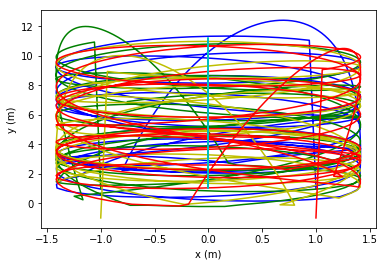

In [27]:
t = 0
tfinal=10


s0 = [xi,yi,vxi,vyi,thetai,omegai] #reset in case I run this cell again

Krot=(1/2)*I*s0[5]**2 #deterines original k's
Ktrans=(1/2)*m*s0[3]**2

ta =np.array([t])
tac=np.array([]) #Time array holding times of collisions
xdata=np.array([xi])
ydata=np.array([yi])
thetaData=np.array([thetai])  
OmegaData=np.array([omegai])
KrotData=np.array([])
KtransData=np.array([])
KtotalData=np.array([])
Edata=np.array([Krot+Ktrans+m*g*s0[1]])


r1cx=np.array([l/2]) #First Corner x data
r1cy=np.array([h/2])     #ydata
r2cx=np.array([-l/2])#2nd Corner x data
r2cy=np.array([h/2])    #ydata
r3cx=np.array([-l/2]) #3rd Corner x data 
r3cy=np.array([-h/2])   #ydata
r4cx=np.array([l/2])  #4th Corner x data
r4cy=np.array([-h/2])   #ydata

r1c=np.array([r1cx,r1cy])#ARRAYS HOLDING INITAL POS
r2c=np.array([r2cx,r2cy])
r3c=np.array([r3cx,r3cy])
r4c=np.array([r4cx,r4cy])


while t < tfinal:
    #integrate
    s1 = ode.RK4n(model_RigidBodyFF, s0, t, dt) #update y[n]
    
    for i in range(len(s1)): #reset y0 to the new vector
        s0[i] = s1[i]

    

    
    xdata=np.append(xdata,s0[0])
    ydata=np.append(ydata,s0[1])
    
        
    
    theta=s0[4]
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    rel1c=np.dot(R,r1c) #Rotated positions 
    rel2c=np.dot(R,r2c)
    rel3c=np.dot(R,r3c)
    rel4c=np.dot(R,r4c)
    
    
    r1cx=np.append(r1cx,rel1c[0]+s0[0]) #Append New Data Points for corners
    r1cy=np.append(r1cy,rel1c[1]+s0[1])
    r2cx=np.append(r2cx,rel2c[0]+s0[0])
    r2cy=np.append(r2cy,rel2c[1]+s0[1])
    r3cx=np.append(r3cx,rel3c[0]+s0[0])
    r3cy=np.append(r3cy,rel3c[1]+s0[1])
    r4cx=np.append(r4cx,rel4c[0]+s0[0])
    r4cy=np.append(r4cy,rel4c[1]+s0[1])

    w1=s0[5]#defines omegai
    vi=s0[3]#defines vi
    
    y_corners=[r1cy[-1],r2cy[-1],r3cy[-1],r4cy[-1]]#corners positions
    x_corners=[r1cx[-1],r2cx[-1],r3cx[-1],r4cx[-1]]
    for i in range(len(y_corners)):
        if y_corners[i]<0: #test if each corner hits ground 
            rcx=x_corners[i]
            w2, Fn =  fsolve(equations, (1, 1))#Solves for Fn and omegaf
            s0[5]=s0[5]+(rcx/I)*Fn*dt #Defines new omega
            s0[3]=np.sqrt(((m*vi**2)+(I*w1**2)-(I*s0[5]**2))/m)#Defines new velocity
            
            
            Krot=(1/2)*I*s0[5]**2 #deterines K's at each collision
            Ktrans=(1/2)*m*s0[3]**2
           
            KrotData=np.append(KrotData,Krot)#appends new Krot
            KtransData=np.append(KtransData,Ktrans)#appends new Ktrans
            KtotalData=np.append(KtotalData,Krot+Ktrans)#appends new Ktotal
            tac=np.append(tac,t)
    
    if s0[1] < (l/2):
        s0[3]=-s0[3]
    
    Krot=(1/2)*I*s0[5]**2 #deterines K's during motion
    Ktrans=(1/2)*m*s0[3]**2
    
    
  
    
    thetaData=np.append(thetaData,s0[4])#appends new theta 
    OmegaData=np.append(OmegaData,s0[5])#appends new omega 
    Edata=np.append(Edata,Krot+Ktrans+m*g*s0[1])
    
    
    t = t + dt #update clock
    ta=np.append(ta,t)
    
plt.figure()
plt.plot(r1cx,r1cy, 'b-')
plt.plot(r2cx,r2cy, 'g-')
plt.plot(r3cx,r3cy, 'y-')
plt.plot(r4cx,r4cy, 'r-')
plt.plot(xdata,ydata, 'c-')
plt.xlabel('x (m)')
plt.ylabel('y (m)')  
plt.show()




### 3.2 Animating Motion of Square Including Torque from the Floor

Since the animation takes in positions for each corner,the theta value and CM position, the animation does not have to be changed from section 2.2. The loop above calculates all of that for a $F_N$ when the square hits the floor.

In [30]:
AnimateFF_WC(ta,xdata,ydata,thetaData,r1cx,r1cy,r2cx,r2cy,r3cx,r3cy,r4cx,r4cy)

<IPython.core.display.Javascript object>

## 4. Observing Energy During Motion

The last code that integrates the motion of the cube also calculated rotational Kinetic, translational kinetic energy, total kinetic energy, and total energy at each time step. To show that energy is conserved the plot below plots energy as a function of time.

ERROR! Session/line number was not unique in database. History logging moved to new session 337


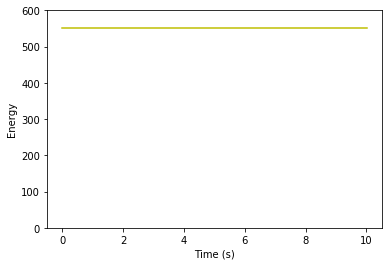

In [28]:
plt.figure()
plt.plot(ta,Edata, 'y-')
plt.xlabel('Time (s)')
plt.ylabel('Energy')  
plt.ylim(0,600)
plt.show()

### 4.1 Kinetic Energy at Collisions

Since we assume elastic collisions that means that the kinetic energy is conserved during each collision. As seen earlier, the total kinetic energy for the square includes a rotational kinetic energy and a translational kinetic energy. During each collision, when either form of kinetic energy gains magnitude, the other form of kinetic energy will decrease in magnitude. A plot of the different kinetic energies as a function of time helps demonstrate this.      

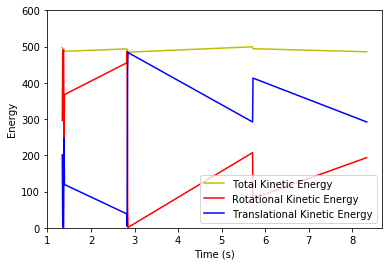

In [34]:
plt.figure()
plt.plot(tac,KtotalData, 'y-',label='Total Kinetic Energy')
plt.plot(tac,KrotData, 'r-',label='Rotational Kinetic Energy')
plt.plot(tac,KtransData, 'b-',label='Translational Kinetic Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.legend()
plt.ylim(0,600)

plt.show()

It can be observed from the plot above that Kinetic energy is for the most part conserved during collisions but after certain times the Kinetic energy changes slightly. A possiblity on why this happens, is that when I update the new velocity and omega value after the collisions, I assume that the velocity in the y direction is the only direction the velocity changes but, a collision with the floor can also contribute to a change in velocity in the x direction. I assumed this because I did not set an initial x velocity for the purpose of simplifing the motion. However, even though I made that assumption, it does not affect the total kinetic energy enough to substantially change the behavior of the system.    


It may also help read the plot to note, for parts of the plot where it seems like each form of kinetic energy has more than one value at the respected times, there are actully multiple collisions with the ground happening in a very short time step.